### Image manipulation using numpy: From general operations to convolutions, mathematical morphology and segmentation.

Hello y'all! I'm Ottavio, an entry level Data Scientist. Today i'll walk you through this notebook which contains the very basic of numpy applied to images and their basic operations, convolutions, mathematical morphology and segmentation.

In [111]:
# Lets start by activating the interactive shell and import the necessary libraries:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import imageio.v2 as imageio
from skimage import color
from skimage import io
from skimage import data
from scipy import ndimage

Now, lets use an image to start us off. I chose one provided by the imageio.v2 library:

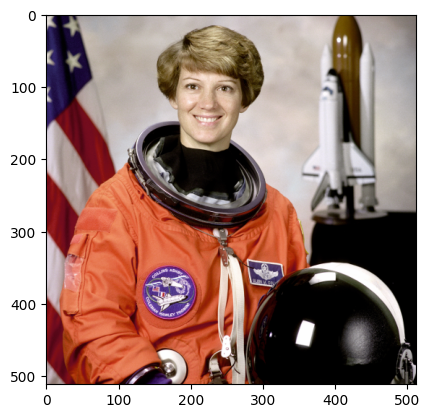

In [56]:
face = imageio.imread('imageio:astronaut.png')
plt.imshow(face);

Lets plot the image in scales of gray. This will result useful later on in the notebook.

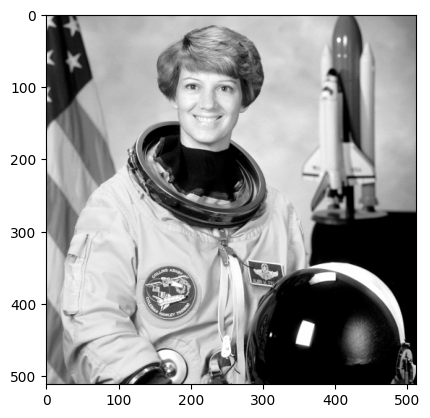

In [57]:
plt.imshow(face[:,:,0], cmap = plt.cm.gray);

The original image has an rbg encoding, which means the colors are formed using a combination of red, blue and green. We can see this better when we isolate those single colors:

In [58]:
def rgb_splitter(image):
    rgb_list = ['Reds','Greens','Blues']
    fig, ax = plt.subplots(1, 3, figsize=(15,5), sharey = True)
    for i in range(3):
        ax[i].imshow(image[:,:,i], cmap = rgb_list[i])
        ax[i].set_title(rgb_list[i], fontsize = 15)


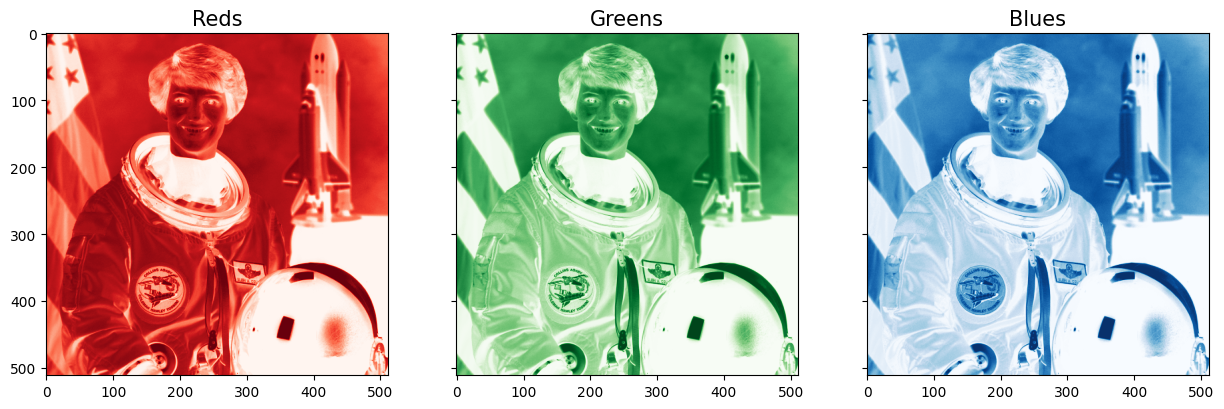

In [59]:
rgb_splitter(face)

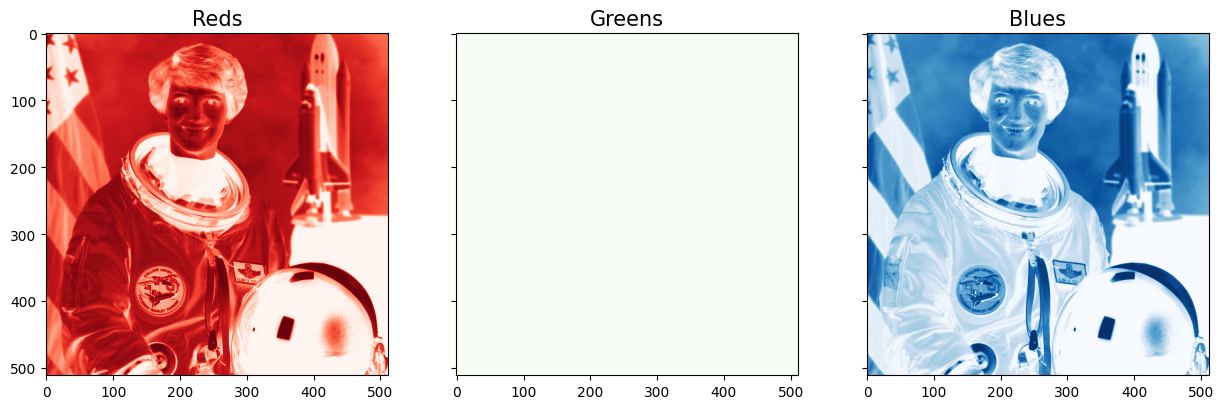

In [60]:
#Lets set all the values from the green channel to 255: this value will result in a stronger presence of the color green.
face_c = face.copy()
face_c[:,:,1] = 255
rgb_splitter(face_c)

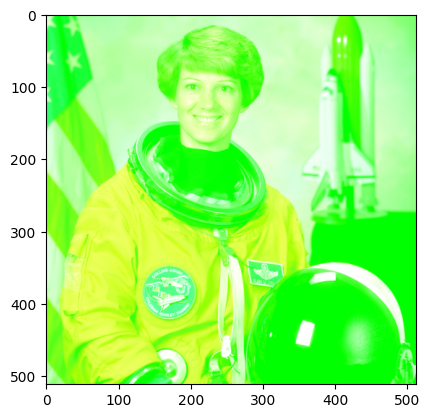

In [61]:
plt.imshow(face_c);

What else can we do?
By selecting the array indexes we want to read, we can visualize parts of the image. This is particularly useful in ML algorithms like image recognition.


 (40, 90, 3) uint8


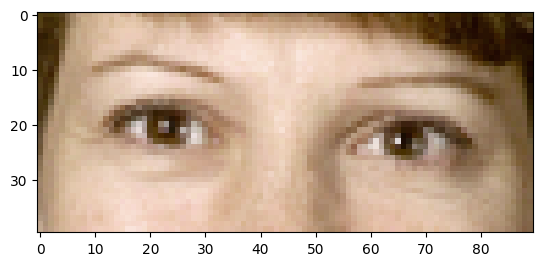

In [62]:
#Let us try and select the eyes:
face2 = face[80:120, 180:270]
print('\n', face2.shape, face2.dtype)
plt.imshow(face2);

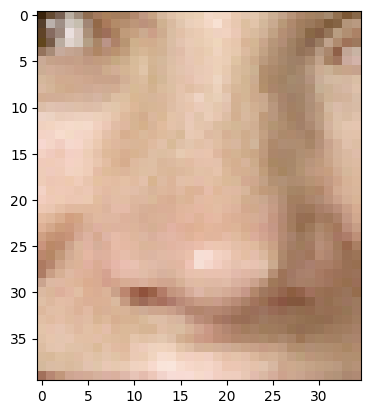

In [63]:
#Now the nose!
nose = face[100:140, 205:240]
plt.imshow(nose);

Lets create a new object and set its value to be the grayscale version of our original image: this will allow us to perform several operations.

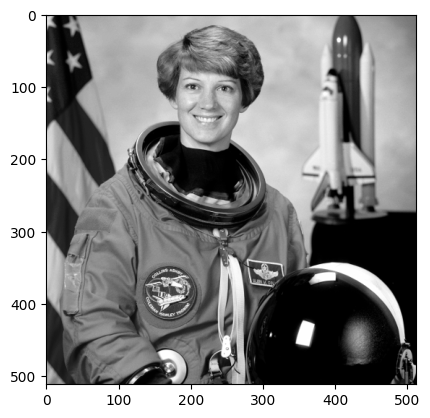

In [64]:
gray = color.rgb2gray(face)
plt.imshow(gray, cmap= plt.cm.gray);

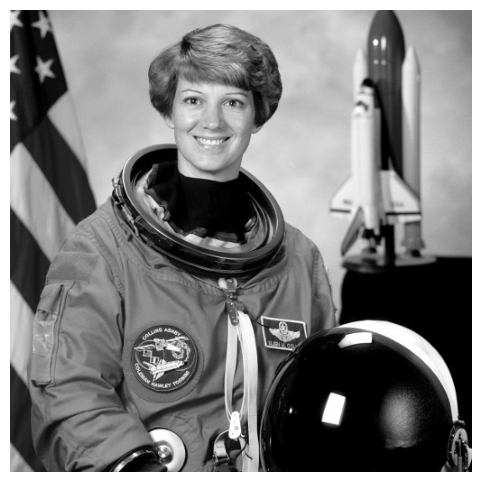

In [65]:
# Apply a mask
fm = gray.copy()
fm[250:350,525:750] = 255

plt.figure(figsize=(6, 6))
plt.imshow(fm, cmap=plt.cm.gray)
plt.axis('off')

plt.show();


There are numerous operation we can apply to images:

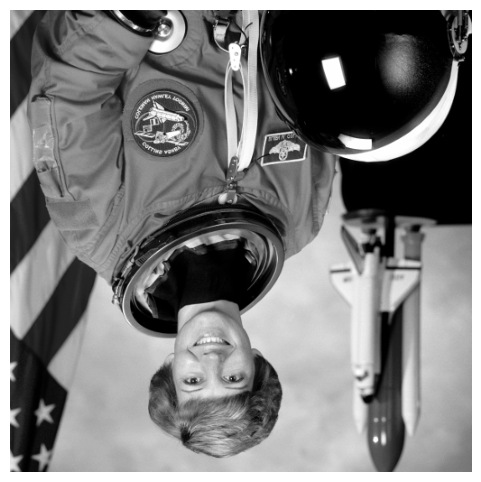

In [66]:
# Up-down flip
flip_ud_face = np.flipud(gray)

plt.figure(figsize=(6, 6))
plt.imshow(flip_ud_face, cmap=plt.cm.gray)
plt.axis('off')

plt.show();

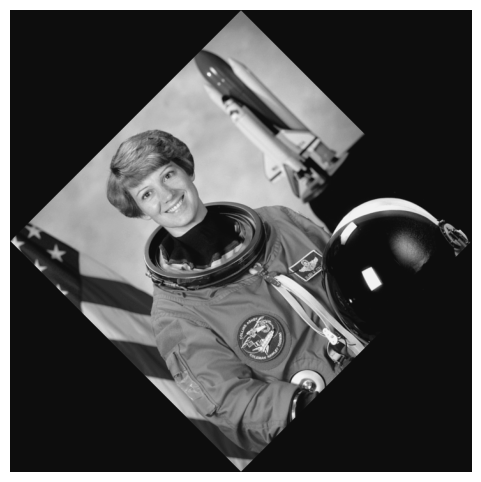

In [67]:
# Rotation
rotate_face = ndimage.rotate(gray, 45)

plt.figure(figsize=(6, 6))
plt.imshow(rotate_face, cmap=plt.cm.gray)
plt.axis('off')

plt.show();

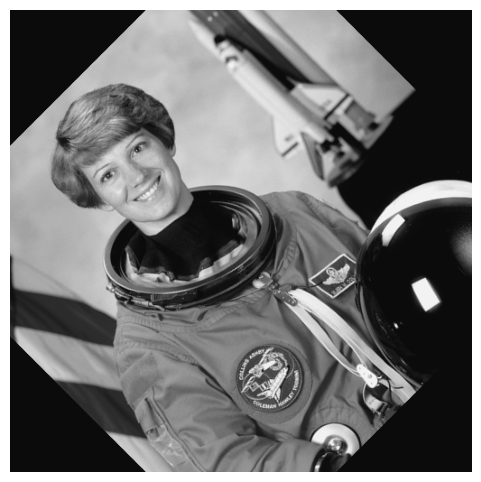

In [68]:
# Rotation
rotate_face = ndimage.rotate(gray, 45, reshape=False)

plt.figure(figsize=(6, 6))
plt.imshow(rotate_face, cmap=plt.cm.gray)
plt.axis('off')

plt.show();

### Filters

Filters allow us to apply modifications to the way our images are shown. We will see some of the most common ones, all of which require a particular operation named *convolution*.

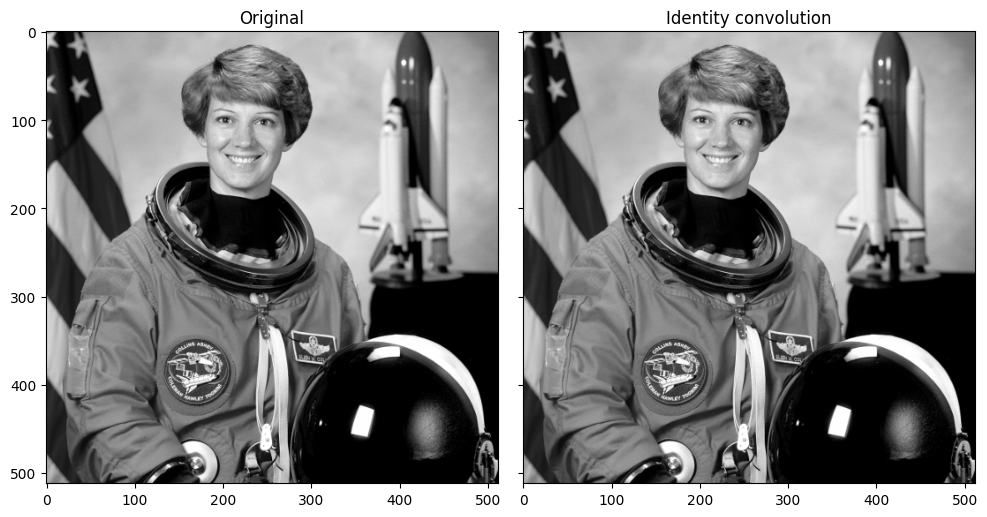

In [69]:
image = gray

kernel = np.array([ [0,0,0], 
                    [0,1,0], 
                    [0,0,0]]) 

filtered = ndimage.convolve(image, kernel, mode='constant', cval=0.0)

fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True,
                       figsize=(10, 10))

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Original')

ax[1].imshow(filtered, cmap=plt.cm.gray)
ax[1].set_title('Identity convolution')

plt.tight_layout()
plt.show();


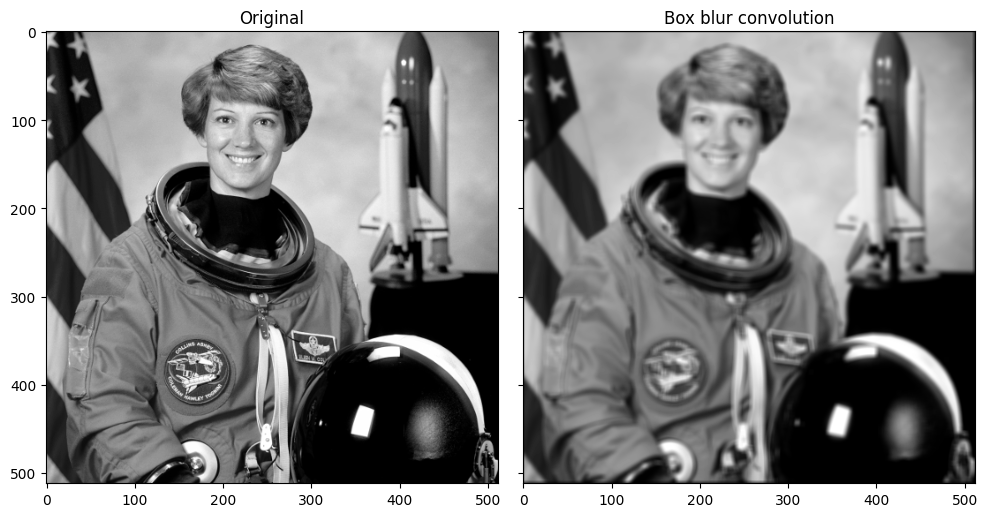

In [70]:
image = gray

kernel = np.ones([6,6])/36
filtered = ndimage.convolve(image, kernel, mode='constant', cval=0.0)

fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True,
                       figsize=(10, 10))

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Original')

ax[1].imshow(filtered, cmap=plt.cm.gray)
ax[1].set_title('Box blur convolution')

plt.tight_layout()
plt.show();


#### The bigger the kernel the stronger the blur

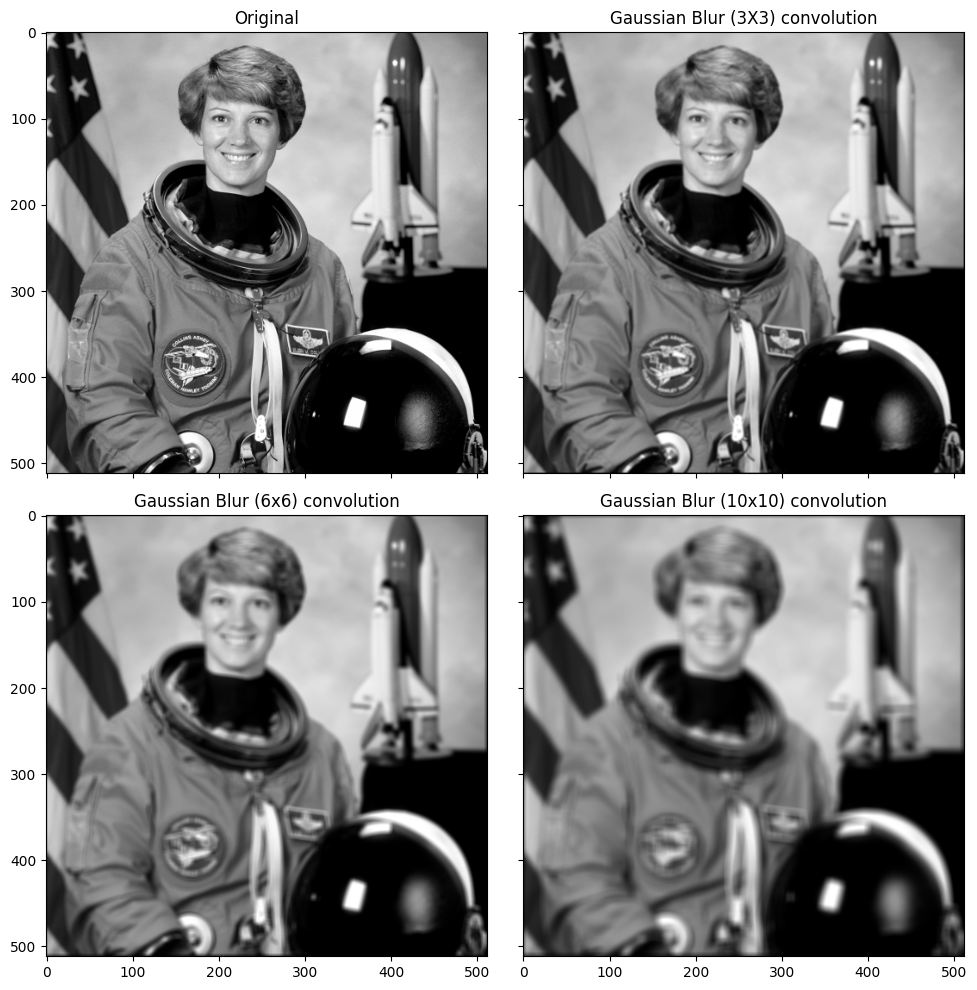

In [71]:


image = gray

kernel = np.ones((3,3)) 
kernel_2 = np.ones((6,6))
kernel_3 = np.ones((10,10))

filtered = ndimage.convolve(image, kernel, mode='constant', cval=0.0)
filtered_2 = ndimage.convolve(image, kernel_2, mode='constant', cval=0.0)
filtered_3 = ndimage.convolve(image, kernel_3, mode='constant', cval=0.0)

fig, ax = plt.subplots(ncols=2, nrows=2, sharex=True, sharey=True,
                       figsize=(10, 10))

ax[0,0].imshow(image, cmap=plt.cm.gray)
ax[0,0].set_title('Original')

ax[0,1].imshow(filtered, cmap=plt.cm.gray)
ax[0,1].set_title('Gaussian Blur (3X3) convolution')

ax[1,0].imshow(filtered_2, cmap=plt.cm.gray)
ax[1,0].set_title('Gaussian Blur (6x6) convolution')

ax[1,1].imshow(filtered_3, cmap=plt.cm.gray)
ax[1,1].set_title('Gaussian Blur (10x10) convolution')

plt.tight_layout()
plt.show();


Lets take a closer look to see what's happening exactly.

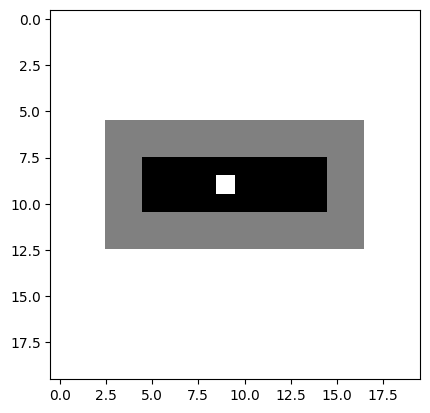

In [72]:
line = np.ones((20,20))
line[6:13,3:17] = 0.5
line[8:11,5:15] = 0
line[9,9] = 1

plt.imshow(line, cmap=plt.cm.gray);

Lets apply box blur convolution:

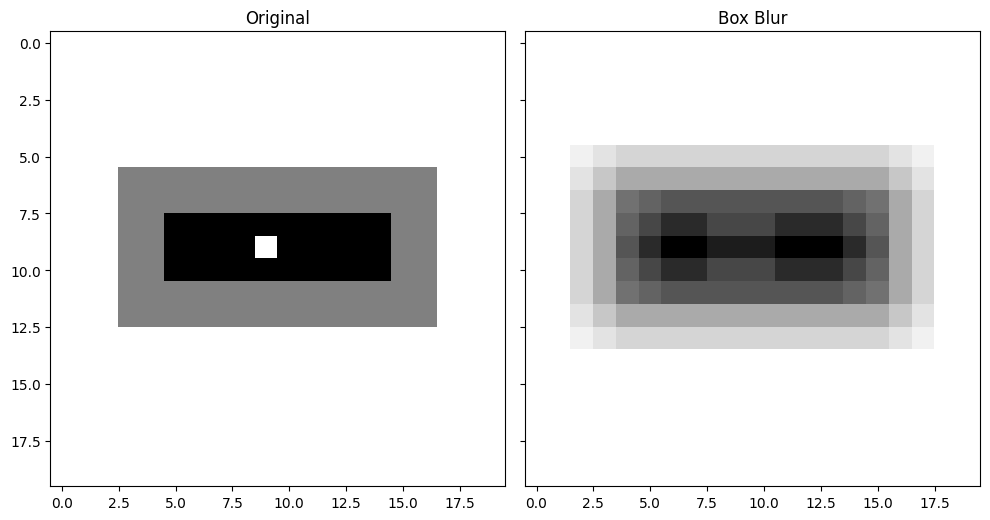

In [73]:
kernel = np.ones([3,3])/9
filtered2 = ndimage.convolve(line, kernel, mode='nearest', cval=0.0)

fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True,
                       figsize=(10, 10))

ax[0].imshow(line, cmap=plt.cm.gray)
ax[0].set_title('Original')

ax[1].imshow(filtered2, cmap=plt.cm.gray)
ax[1].set_title('Box Blur')

plt.tight_layout()
plt.show();

Box bllur convolution essentially calculates the average multiplications of the image array values with the kernel values. This explains why a larger kernel creates stronger blur: the resulting array value is the product of a bigger portion of the image.

The following illustration can explain all of this much better:

In [1]:
from IPython.display import HTML
HTML('<img src="https://miro.medium.com/v2/resize:fit:828/1*PzSEqByMOkM_XfwYPGwrDg.gif">')

https://miro.medium.com/v2/resize:fit:828/1*PzSEqByMOkM_XfwYPGwrDg.gif.png

There are more types of convolutions we can apply. Here are a few examples:

High-pass filter convolution

[[-0.11111111 -0.11111111 -0.11111111]
 [-0.11111111  0.88888889 -0.11111111]
 [-0.11111111 -0.11111111 -0.11111111]]


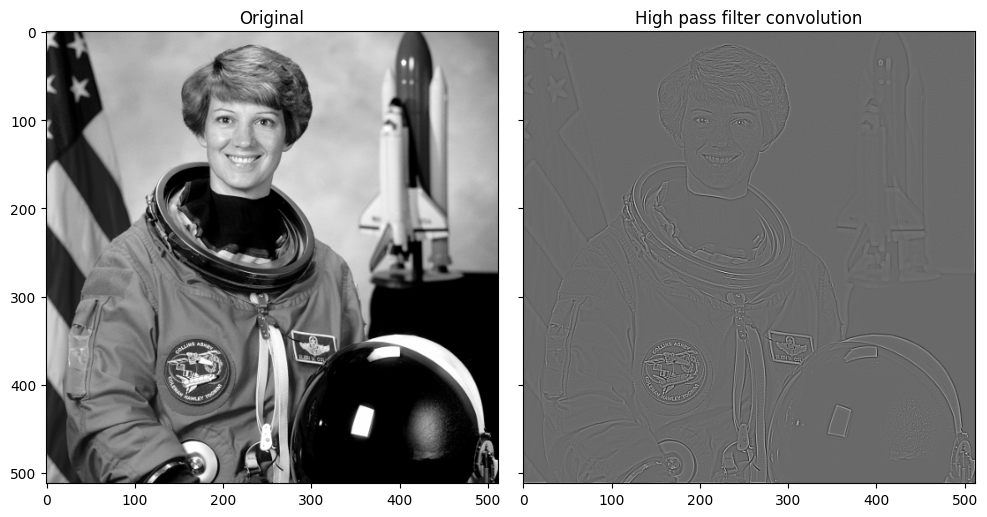

In [74]:
image = gray

kernel = np.array([ [-1, -1, -1], 
                    [-1, 8, -1], 
                    [-1, -1, -1]]) / 9

print(kernel)

filtered = ndimage.convolve(image, kernel, mode='constant', cval=0.0)

fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True,
                       figsize=(10, 10))

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Original')

ax[1].imshow(filtered, cmap=plt.cm.gray)
ax[1].set_title('High pass filter convolution')

plt.tight_layout()
plt.show();


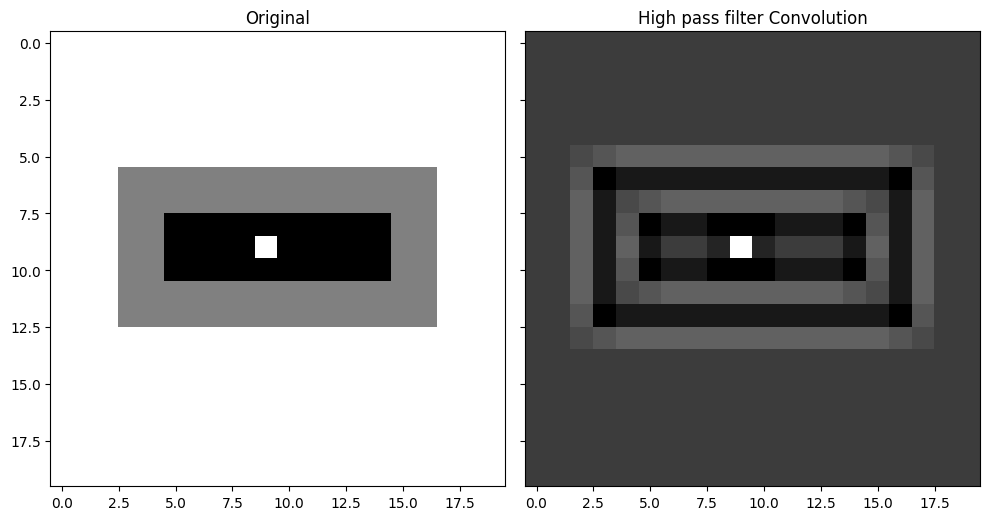

In [75]:
kernel = np.array([ [-1, -1, -1], 
                    [-1, 8, -1], 
                    [-1, -1, -1]]) / 9

filtered3 = ndimage.convolve(line, kernel, mode='nearest', cval=0.0)

fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True,
                       figsize=(10, 10))

ax[0].imshow(line, cmap=plt.cm.gray)
ax[0].set_title('Original')

ax[1].imshow(filtered3, cmap=plt.cm.gray)
ax[1].set_title('High pass filter Convolution')

plt.tight_layout()
plt.show();

Sharpen convolution

[[ 0 -1  0]
 [-1  5 -1]
 [ 0 -1  0]]


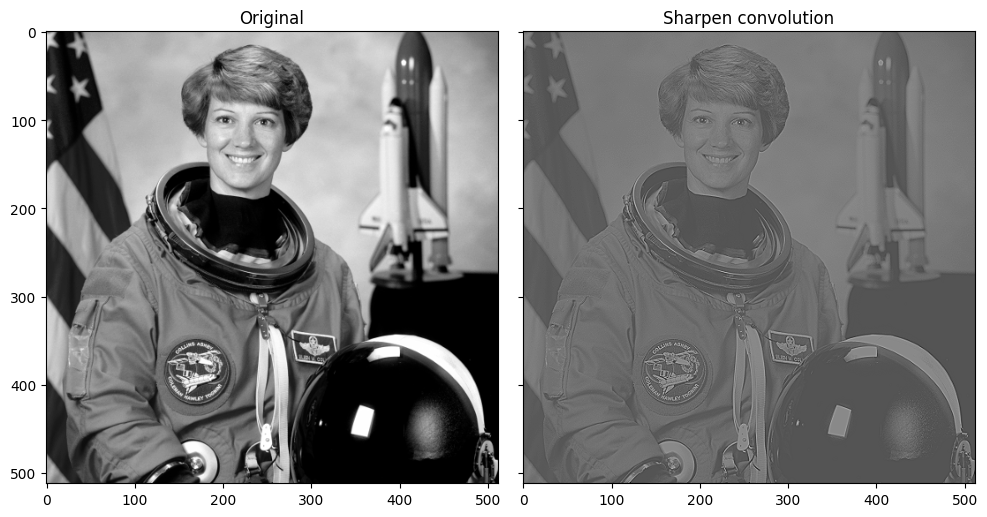

In [76]:
image = gray

kernel = np.array([ [0, -1, 0], 
                    [-1, 5, -1], 
                    [0, -1, 0]])

print(kernel)

filtered = ndimage.convolve(image, kernel, mode='mirror', cval=0.0)

fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True,
                       figsize=(10, 10))

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Original')

ax[1].imshow(filtered, cmap=plt.cm.gray)
ax[1].set_title('Sharpen convolution')

plt.tight_layout()
plt.show();


Vertical edge convolution

[[-1  0  1]
 [-1  0  1]
 [-1  0  1]]


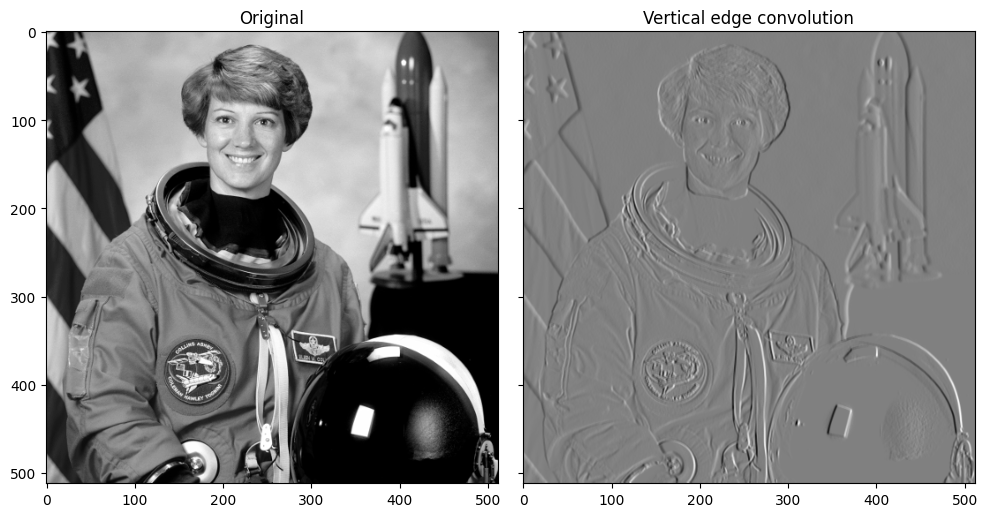

In [77]:
image = gray

kernel = np.array([ [-1, 0, 1], 
                    [-1, 0, 1], 
                    [-1, 0, 1]])

print(kernel)

filtered = ndimage.convolve(image, kernel, mode='mirror', cval=0.0)

fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True,
                       figsize=(10, 10))

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Original')

ax[1].imshow(filtered, cmap=plt.cm.gray)
ax[1].set_title('Vertical edge convolution')

plt.tight_layout()
plt.show();


Horizontal edge convolution

[[ 1  1  1]
 [ 0  0  0]
 [-1 -1 -1]]


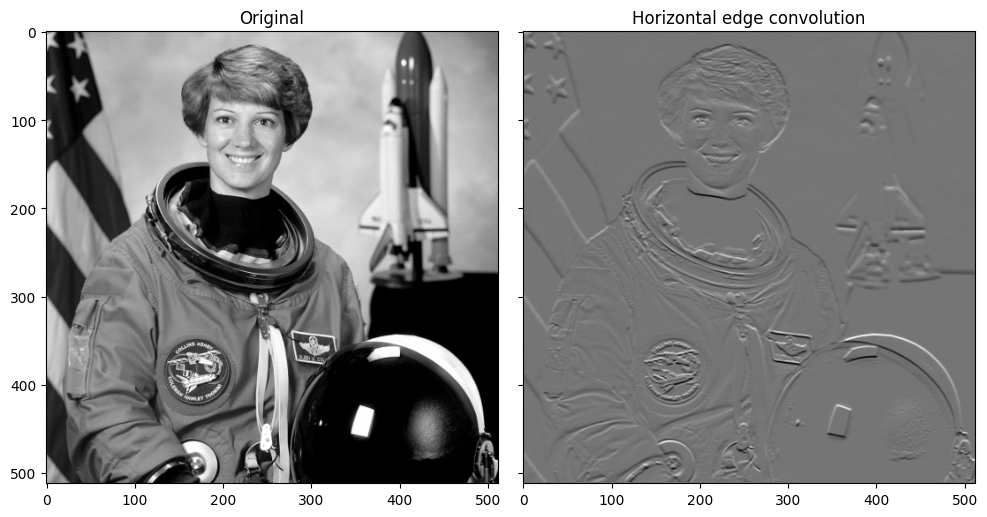

In [78]:
image = gray

kernel = np.array([ [1, 1, 1], 
                    [0, 0, 0], 
                    [-1, -1, -1]])

print(kernel)

filtered = ndimage.convolve(image, kernel, mode='mirror', cval=0.0)

fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True,
                       figsize=(10, 10))

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Original')

ax[1].imshow(filtered, cmap=plt.cm.gray)
ax[1].set_title('Horizontal edge convolution')

plt.tight_layout()
plt.show();


Edge and Gaussina edge convolution

[[ 1  1  1]
 [ 0  0  0]
 [-1 -1 -1]]


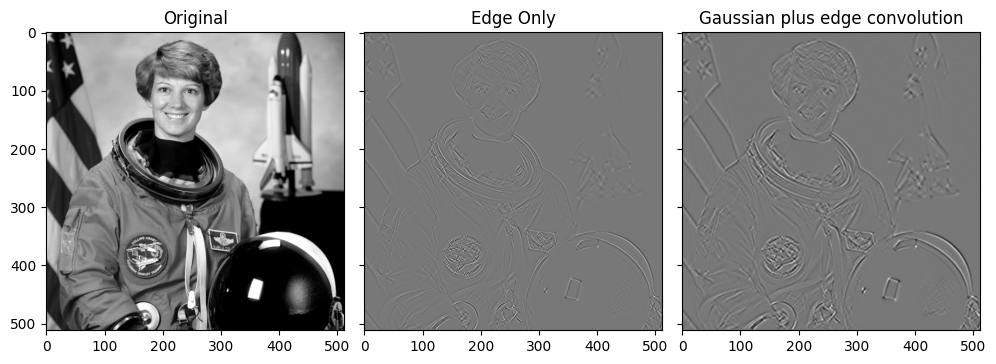

In [79]:
image = gray

kernel_gaussian = 1/1024*np.array([ [1, 4, 6, 4, 1], 
                        [4, 16, 24, 16, 4], 
                        [6, 24, 36, 24, 6],
                        [4, 16, 24, 16, 4],
                        [1, 4, 6, 4, 1]]) 

kernel_edge = np.array([ [1, 0, -1], 
                       [0, 0, 0], 
                        [-1, 0, 1]])

print(kernel)

filtered = ndimage.convolve(image, kernel_gaussian, mode='mirror', cval=0.0)
edge_only = ndimage.convolve(image, kernel_edge, mode='mirror', cval=0.0)
edge = ndimage.convolve(filtered, kernel_edge, mode='mirror', cval=0.0)
fig, ax = plt.subplots(ncols=3, sharex=True, sharey=True,
                       figsize=(10, 10))

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Original')

ax[1].imshow(edge_only, cmap=plt.cm.gray)
ax[1].set_title('Edge Only')

ax[2].imshow(edge, cmap=plt.cm.gray)
ax[2].set_title('Gaussian plus edge convolution')

plt.tight_layout()
plt.show();


### Matematical Morphology

In many cases, binary images can be manipulated in order to obtain different results. Using mathematical morphology we can further modify binary images to achieve extremely helpful results. In the past, these tecniques have helped in many studies, including clinical research. Lets see the most important types of transformations.

#### Erosion

The details of erosion morphology go deep in euclidean mathematics, which are out of the scope of this project. You can find more [here](https://en.wikipedia.org/wiki/Erosion_(morphology)).
Most of the other operations are derived from erosion, which essentially reduces the total area of array values.

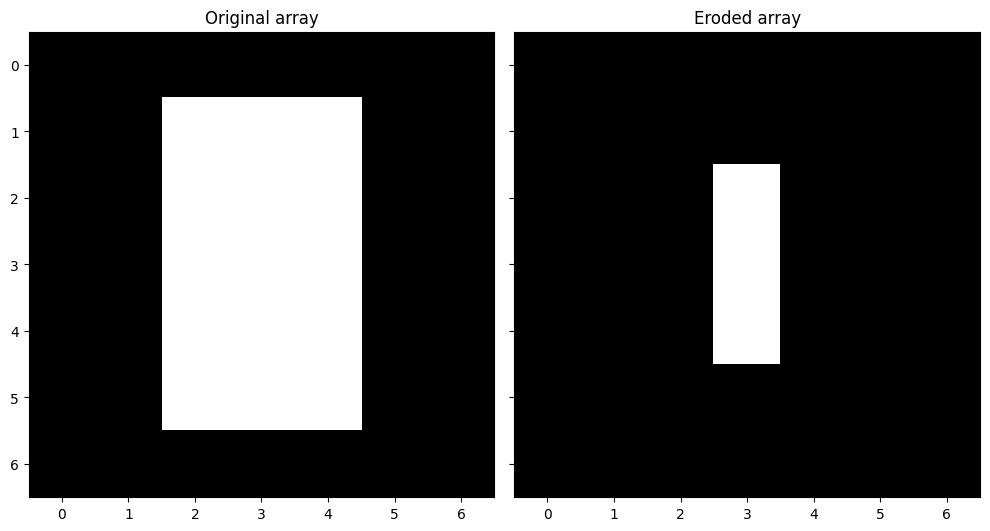

In [80]:
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt

# Original array
a = np.zeros((7,7), dtype='int')
a[1:6, 2:5] = 1

 # Erosion
e = ndimage.binary_erosion(a, structure=np.ones((3,3))).astype(a.dtype)

# Plotting
fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True,
                       figsize=(10, 10))

ax[0].imshow(a, cmap=plt.cm.gray)
ax[0].set_title('Original array')

ax[1].imshow(e, cmap=plt.cm.gray)
ax[1].set_title('Eroded array')

plt.tight_layout()
plt.show();

#### Dilation

Quite the opposite of erosion and another important asset for more complex operations.

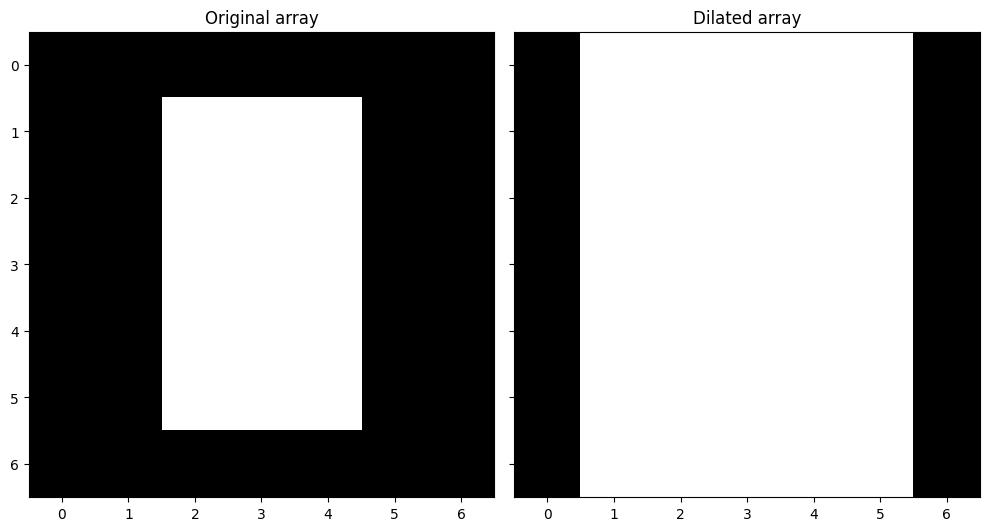

In [81]:
# Original array
a = np.zeros((7,7), dtype='int')
a[1:6, 2:5] = 1

 # Dilation
d = ndimage.binary_dilation(a, structure=np.ones((3,3))).astype(a.dtype)

# Plotting
fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True,
                       figsize=(10, 10))

ax[0].imshow(a, cmap=plt.cm.gray)
ax[0].set_title('Original array')

ax[1].imshow(d, cmap=plt.cm.gray)
ax[1].set_title('Dilated array')

plt.tight_layout()
plt.show();


#### Opening

Essentially sequences an erosion followed byy a dilation.

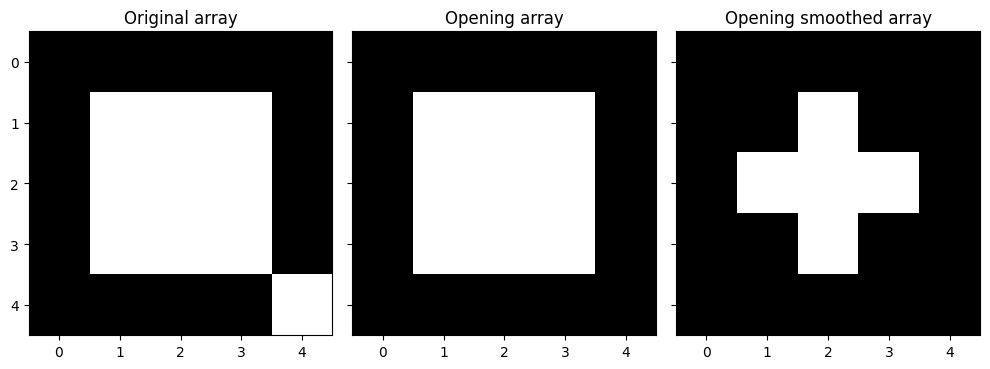

In [82]:
# Original array
a = np.zeros((5,5), dtype='int')
a[1:4, 1:4] = 1; a[4, 4] = 1

 # Opening
o = ndimage.binary_opening(a, structure=np.ones((3,3))).astype(a.dtype)

# Opening with "cross" kernel
oc = ndimage.binary_opening(a).astype(a.dtype)

# Plotting
fig, ax = plt.subplots(ncols=3, sharex=True, sharey=True,
                       figsize=(10, 10))

ax[0].imshow(a, cmap=plt.cm.gray)
ax[0].set_title('Original array')

ax[1].imshow(o, cmap=plt.cm.gray)
ax[1].set_title('Opening array')

ax[2].imshow(oc, cmap=plt.cm.gray)
ax[2].set_title('Opening smoothed array')

plt.tight_layout()
plt.show();


#### Closing

Often used in conjunction with a closing, it's their's direct opposite, dilating and then eroding.

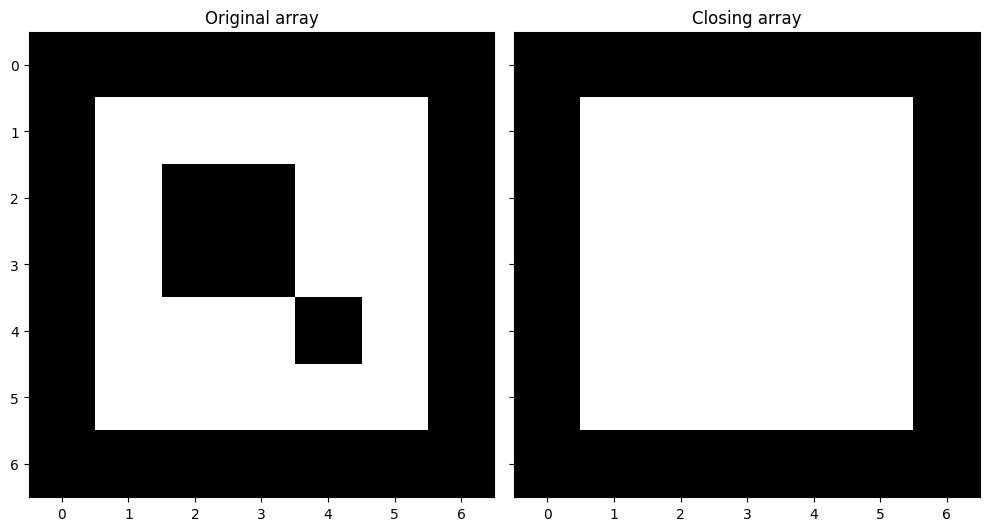

In [83]:
# Original array
a = np.zeros((7,7), dtype='int')
a[1:6, 1:6] = 1
a[2:4, 2:4] = 0
a[4:5, 4:5] = 0

 # Closing
o = ndimage.binary_closing(a, structure=np.ones((3,3))).astype(a.dtype)

# Plotting
fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True,
                       figsize=(10, 10))

ax[0].imshow(a, cmap=plt.cm.gray)
ax[0].set_title('Original array')

ax[1].imshow(o, cmap=plt.cm.gray)
ax[1].set_title('Closing array')

plt.tight_layout()
plt.show();


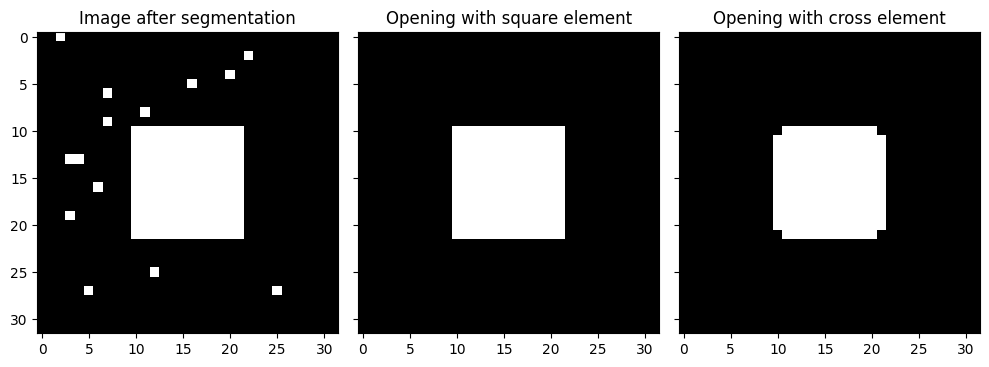

In [84]:
# Fake image after segmentation
square = np.zeros((32, 32))
square[10:-10, 10:-10] = 1
np.random.seed(2)
x, y = (32*np.random.random((2, 20))).astype('int')
square[x, y] = 1

# Opening with a square kernel
open_square = ndimage.binary_opening(square, structure=np.ones((3,3)))

# Opening with a cross kernel
open_square_cross = ndimage.binary_opening(square)

# Plotting
fig, ax = plt.subplots(ncols=3, sharex=True, sharey=True,
                       figsize=(10, 10))

ax[0].imshow(square, cmap=plt.cm.gray)
ax[0].set_title('Image after segmentation')

ax[1].imshow(open_square, cmap=plt.cm.gray)
ax[1].set_title('Opening with square element')

ax[2].imshow(open_square_cross, cmap=plt.cm.gray)
ax[2].set_title('Opening with cross element')

plt.tight_layout()
plt.show();


### Segmentation

Segmentation is the process of separating different objects in an image by labeling them. Lets see how it can be done.

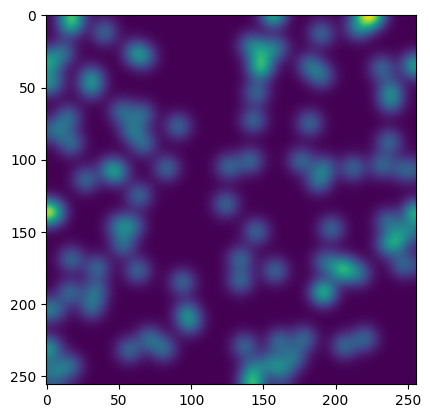

In [85]:
# Create a random blob image
np.random.seed(1)
n = 10
l = 256
im = np.zeros((l, l))
points = l*np.random.random((2, n**2))
im[(points[0]).astype(int), (points[1]).astype(int)] = 1
im = ndimage.gaussian_filter(im, sigma=l/(4.*n))
plt.imshow(im);

Now, lets separate he values in a binary selection. We can do this by assigning a boolean value to the values in our array:

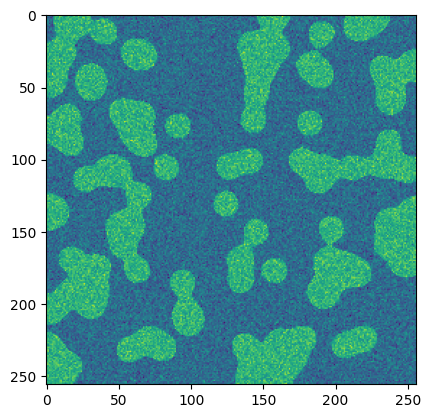

In [86]:
# Selecting the mask
mask = (im > im.mean()).astype(float)
img = mask + 0.3*np.random.randn(mask.shape[0], mask.shape[1])
plt.imshow(img);

In [87]:
# Binary image
hist, bin_edges = np.histogram(img, bins=60)
bin_centers = 0.5*(bin_edges[:-1] + bin_edges[1:])

We can now plot the histogram for the image density:

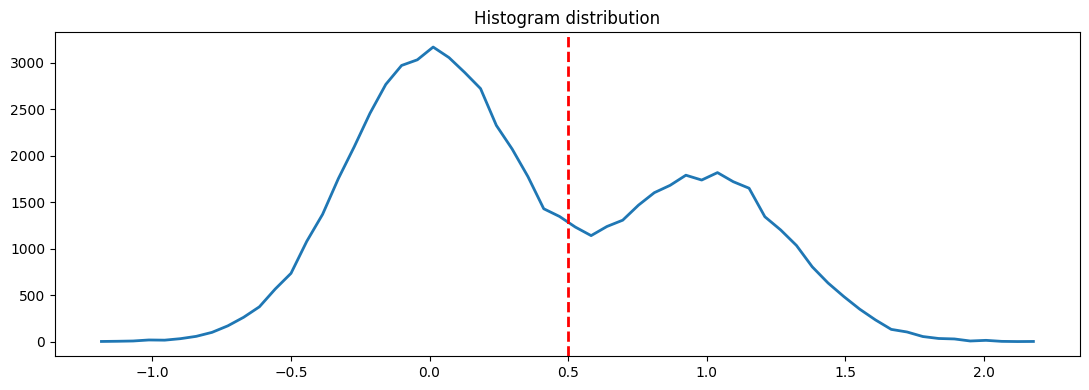

In [88]:
# Plotting histogram
fig, ax = plt.subplots(ncols=1, sharex=True, sharey=True,
                       figsize=(11, 4))

ax.plot(bin_centers, hist, lw=2)
ax.axvline(0.5, color='r', ls='--', lw=2)
ax.set_title('Histogram distribution')

plt.tight_layout()
plt.show();


We can see that the values split around the 0.5 value: lets use it as a threshold:

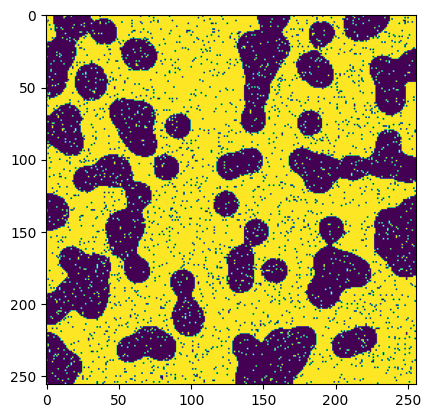

In [89]:
binary_img = img < 0.5
plt.imshow(binary_img);

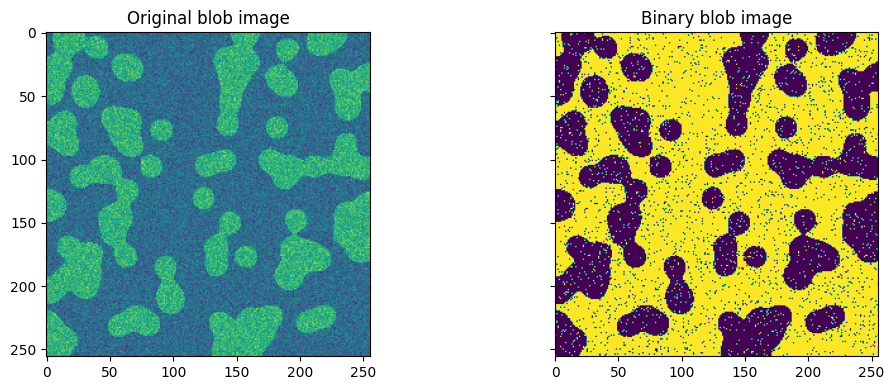

In [90]:
# Plotting segmentation
fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True,
                       figsize=(11, 4))

ax[0].imshow(img)
ax[0].set_title('Original blob image')

ax[1].imshow(binary_img)
ax[1].set_title('Binary blob image')

plt.tight_layout()
plt.show();

We will now use the opening and closing techniques we just learnt to clean the image from the noise. Then, we will higlight the countours of each object found:

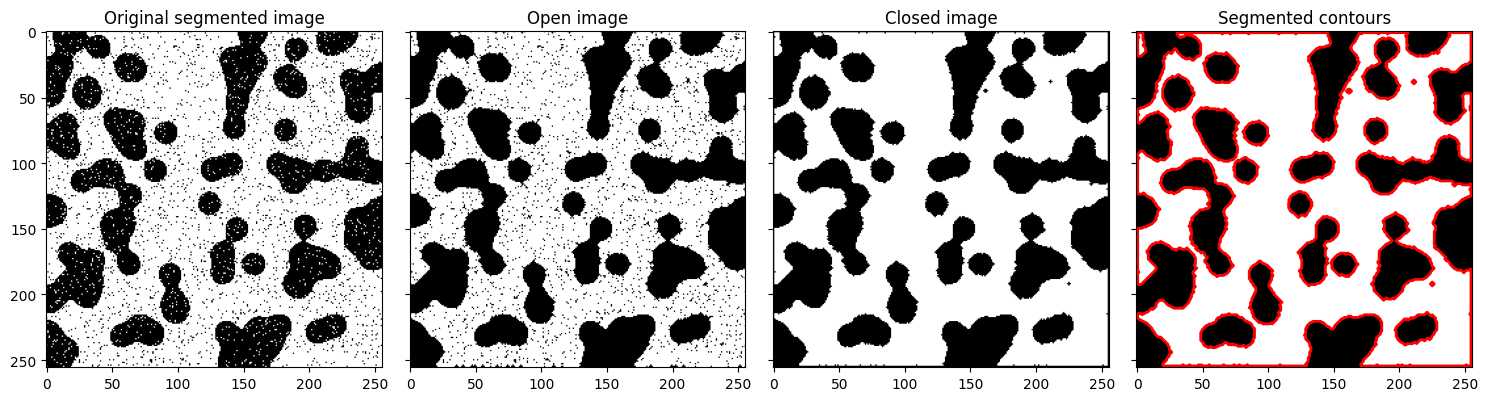

In [91]:
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt

# Remove small white regions
open_img = ndimage.binary_opening(binary_img)

# Remove small black hole
close_img = ndimage.binary_closing(open_img)

# Plotting segmentation
fig, ax = plt.subplots(ncols=4, sharex=True, sharey=True,
                       figsize=(15, 11))

ax[0].imshow(binary_img, cmap=plt.cm.gray)
ax[0].set_title('Original segmented image')

ax[1].imshow(open_img, cmap=plt.cm.gray)
ax[1].set_title('Open image')

ax[2].imshow(close_img, cmap=plt.cm.gray)
ax[2].set_title('Closed image')

ax[3].imshow(close_img, cmap=plt.cm.gray)
ax[3].contour(close_img, [0.5], linewidths=2, colors='r')
ax[3].set_title('Segmented contours')

plt.tight_layout()
plt.show();


Now that we know how its done, lets use it on an actual image: we will use the data library in the skimage module:

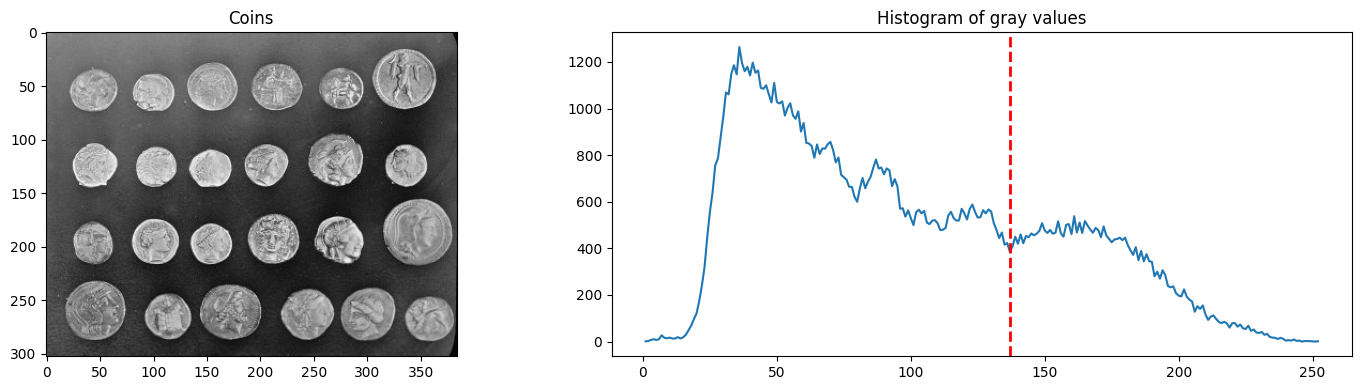

In [102]:
from skimage.exposure import histogram

coins = data.coins()
hist, hist_centers = histogram(coins)

# Plotting segmentation
fig, ax = plt.subplots(ncols=2, sharex=False, sharey=False,
                       figsize=(15, 4))

ax[0].imshow(coins, cmap=plt.cm.gray)
ax[0].set_title('Coins')

ax[1].plot(hist_centers, hist)
ax[1].axvline(137, color='r', ls='--', lw=2)
ax[1].set_title('Histogram of gray values')

plt.tight_layout()
plt.show();


Lets filter for a value > than 137, since it's the visible threshold:

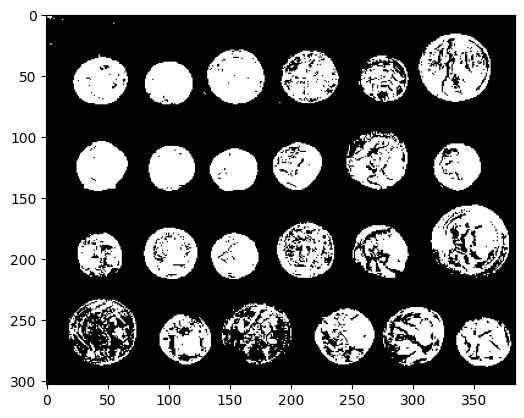

In [104]:
coins_binary = coins > 137 
plt.imshow(coins_binary, cmap = plt.cm.gray);

Now we will use the "canny" feature analysis and the "sobel" filter to further analyze and try to come up with a good estimator.

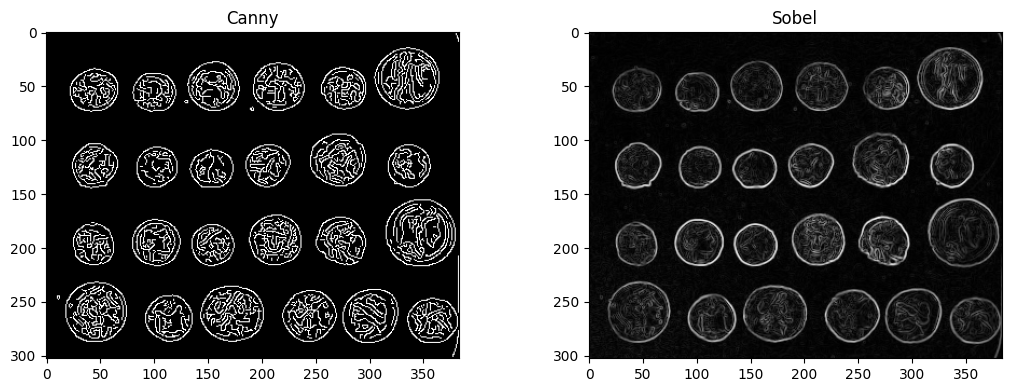

In [106]:
from skimage.feature import canny
from skimage.filters import sobel

coins = data.coins()

canny_coins = canny(coins/255.)

sobel_coins = sobel(coins)

# Plotting segmentation
fig, ax = plt.subplots(ncols=2, sharex=False, sharey=False,
                       figsize=(11, 4))

ax[0].imshow(canny_coins, cmap=plt.cm.gray)
ax[0].set_title('Canny')

ax[1].imshow(sobel_coins, cmap=plt.cm.gray)
ax[1].set_title('Sobel')

plt.tight_layout()
plt.show();


Lets use the canny_coins and try to fill the holes. We can use a function designed just for that: .binary_fill_holes()

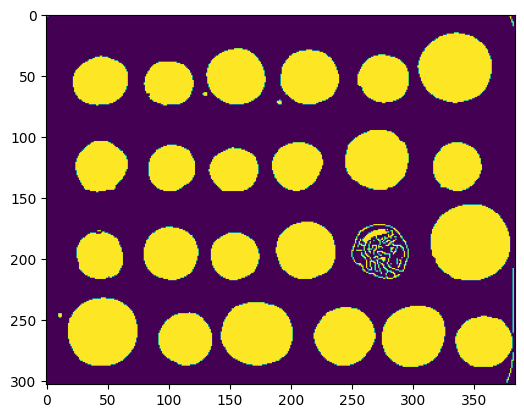

In [114]:
fill_coins = ndimage.binary_fill_holes(canny_coins)
plt.imshow(fill_coins);


Lets now call the label function to get the number of coins:

113


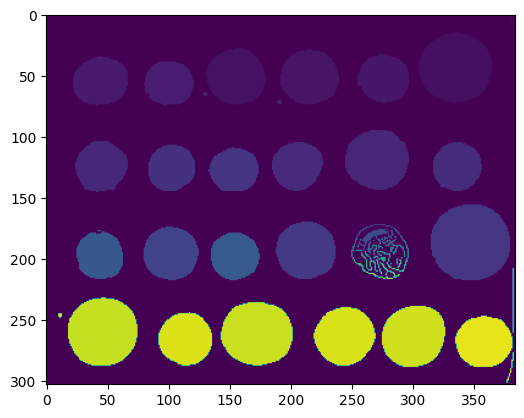

In [115]:
# we call the label function
label_objects, nb_labels = ndimage.label(fill_coins)
print(nb_labels)
plt.imshow(label_objects);


We should have 24 coins, but the label function sees 113 of them. We can solve this by asking to only count in shapes bigger than a threshold:

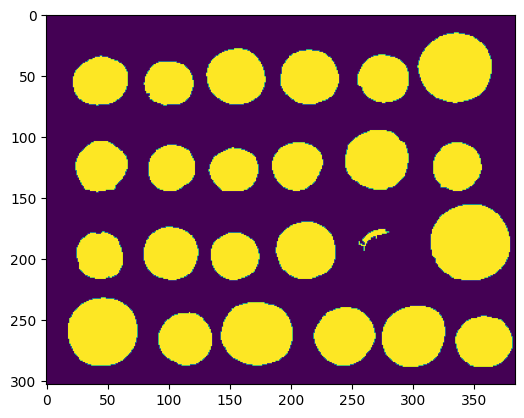

In [118]:
# We get the sizes for each object
sizes = np.bincount(label_objects.ravel())

# Then, we mask everything that is above 20 to try to get most of coins
mask_sizes = sizes > 100
mask_sizes[0] = 0

# We apply the mask to label objects
coins_cleaned = mask_sizes[label_objects]

plt.imshow(coins_cleaned);

24


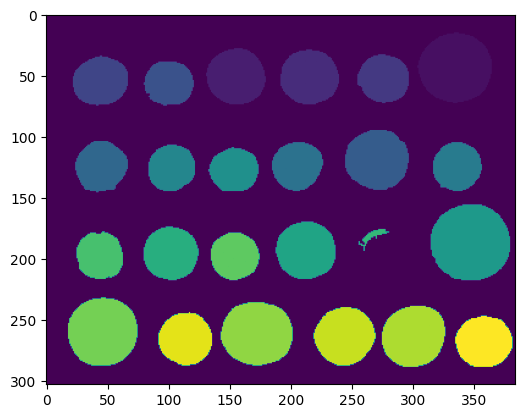

In [119]:
label_objects, nb_labels = ndimage.label(coins_cleaned)
print(nb_labels)
plt.imshow(label_objects);

Looks like we got 24/24, perfect result!
Of course, we have much better tools to recognize the number of coins in a photo now, but what we have seen shows the power of simple numpy operations.


I hope you enjoyed taking a look at this project!